In [1]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
import re
import csv
from collections import defaultdict

#%matplotlib inline

In [2]:
df = pd.read_csv('Reviews.csv', sep=',', error_bad_lines=False, index_col=False)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df.drop(['Id', 'ProductId', 'UserId', 'ProfileName', 'Time'], axis = 1, inplace = True)
df.head()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
0,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,0,0,5,Great taffy,Great taffy at a great price. There was a wid...


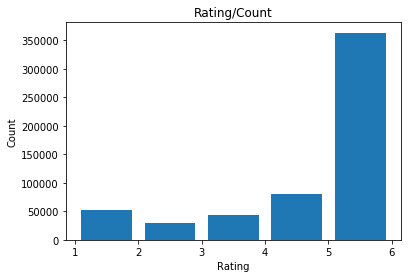

In [4]:
x = df['Score']

bins=[1, 2, 3, 4, 5, 6]

plt.ylabel('Count')
plt.xlabel('Rating')
plt.title('Rating/Count')
plt.hist(x, bins, histtype='bar', rwidth=0.8)

plt.show()




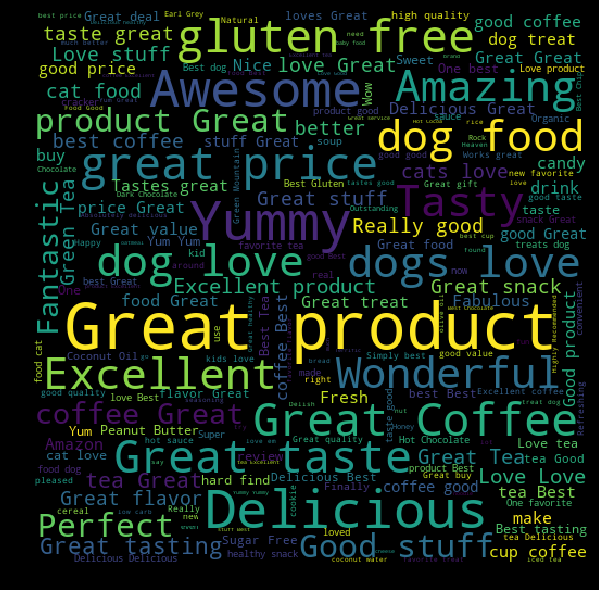

In [5]:
posWords = ' '.join(list(df[df['Score'] == 5]['Summary']))
pos_wc = WordCloud(width = 512,height = 512).generate(posWords)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(pos_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()


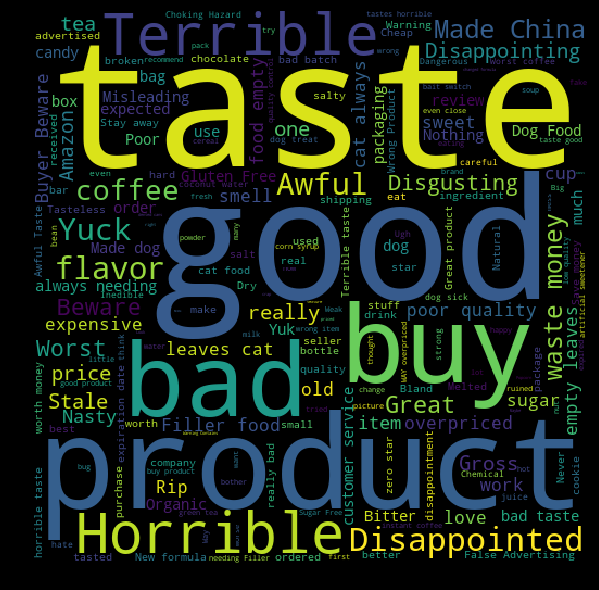

In [24]:
negWords = ' '.join(list(df[df['Score'] == 1]['Summary']))
neg_wc = WordCloud(width = 512,height = 512).generate(negWords)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(neg_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [25]:
counter = defaultdict(int)
searchpm = '!'

with open('Reviews.csv', encoding='UTF-8') as f:
    next(f)  # for skip first row with headers
    for line in csv.reader(f):
        counter[str(line[6])] += line[8].count(searchpm)

print(counter)

#jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000

defaultdict(<class 'int'>, {'5': 153173, '1': 18109, '4': 14248, '2': 3873, '3': 3599})


In [26]:
df['Score'].value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

In [27]:
lst = []
x = 363122/153173
print('In reviews with a score 5; in every ' + str(x) + ' comment there is one comment that involves an !' )
y = 80655/14248
print('In reviews with a score 4; in every ' + str(y) + ' comment there is one comment that involves an !' )
z = 42640/3599
print('In reviews with a score 3; in every ' + str(z) + ' comment there is one comment that involves an !')
t = 29769/3873
print('In reviews with a score 2; in every ' + str(t) + ' comment there is one comment that involves an !' )
s = 52268/18109
print('In reviews with a score 1; in every ' + str(s) + ' comment there is one comment that involves an !' )

lst.append(x)
lst.append(y)
lst.append(z)
lst.append(t)
lst.append(s)

In reviews with a score 5; in every 2.3706658484197605 comment there is one comment that involves an !
In reviews with a score 4; in every 5.660794497473329 comment there is one comment that involves an !
In reviews with a score 3; in every 11.847735482078354 comment there is one comment that involves an !
In reviews with a score 2; in every 7.686289697908598 comment there is one comment that involves an !
In reviews with a score 1; in every 2.886299630018223 comment there is one comment that involves an !


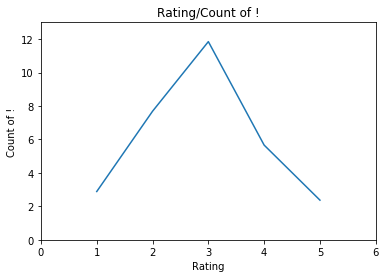

In [28]:
a = [5, 4, 3, 2, 1]
b = lst

plt.ylabel('Count of !')
plt.xlabel('Rating')
plt.title('Rating/Count of !')

plt.plot(a, b)
plt.axis([0, 6, 0, 13])
plt.show()

#plt.plot(a, b, color='orange')


In [29]:
#less the percentage more the '!' usage
#here we see that average comments don't have much '!' while slightly above and below average comments have
#more '!' in them.

In [30]:
count_row = df.shape[0] #row count
print(count_row)

568454


In [ ]:
#spam

In [20]:
totalComm = count_row
trainIndex, testIndex = list(), list()
for i in range(df.shape[0]):
    if np.random.uniform(0, 1) < 0.75:
        trainIndex += [i]
    else:
        testIndex += [i]
trainData = df.loc[trainIndex]
testData = df.loc[testIndex]

In [21]:
trainData.reset_index(inplace = True)
trainData.drop(['index'], axis = 1, inplace = True)
trainData.head()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
0,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
1,0,0,5,Great taffy,Great taffy at a great price. There was a wid...
2,0,0,4,Nice Taffy,I got a wild hair for taffy and ordered this f...
3,0,0,5,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
4,1,1,5,Yay Barley,Right now I'm mostly just sprouting this so my...


In [22]:
testData.reset_index(inplace = True)
testData.drop(['index'], axis = 1, inplace = True)
testData.head()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
0,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...
2,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...
3,0,0,5,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
4,1,1,5,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...


In [23]:
trainData['Score'].value_counts()

5    272514
4     60418
1     39203
3     31946
2     22482
Name: Score, dtype: int64

In [24]:
testData['Score'].value_counts()

5    90608
4    20237
1    13065
3    10694
2     7287
Name: Score, dtype: int64